<a href="https://colab.research.google.com/github/anishadh137/SpatialComputing-/blob/main/CoastalTidalStations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas

In [ ]:
df = pandas.read_csv('/content/drive/MyDrive/Loono/Coastal Tidal Stations/AllStationInfo.csv')

In [ ]:
df.head(20)

,Site,ID,Lat,Long,Bkgd (mm/y),2s,Median rcp85 dynamics in 2100 (mm),17th,83rd,5th,95th,Median climatic rcp85 scaler in 2100,17th.1,83rd.1,5th.1,95th.1,FP: GIS,FP: WAIS,FP: EAIS,FP: Median GIC,FP: Alaska,FP: WesternCanUS,FP: ArcticCanadaNorth,FP: ArcticCanadaSouth,FP: GreenlandGIC,FP: Iceland,FP: Svalbard,FP: Scandinavia,FP: RussianArctic,FP: NorthAsia,FP: CentralEurope,FP: Caucasus,FP: CentralAsia,FP: SouthAsiaWest,FP: SouthAsiaEast,FP: LowLatitudes,FP: SouthernAndes,FP: NewZealand
0,COASTLINE 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,REYKJAVIK,638.0,64.15,-21.94,-0.33,0.96,57.05,-68.79,184.02,-161.89,275.86,0.13,-0.26,0.47,-0.58,0.69,-1.71,1.17,1.11,-1.16,0.97,0.94,-0.12,-0.42,-1.71,-22.94,-0.48,-1.15,0.17,1.23,-0.14,0.58,0.96,0.93,0.93,1.14,1.30,0.97
2,COASTLINE 15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TORSHAVN,839.0,62.02,-6.77,0.64,1.12,77.23,-50.76,207.82,-142.95,300.14,0.55,0.29,0.79,0.08,0.96,-0.65,1.14,1.12,-0.38,1.07,1.06,0.19,0.09,-0.65,-6.14,-0.53,-3.26,0.07,1.25,-0.70,0.36,0.87,0.83,0.83,1.13,1.26,0.94
4,COASTLINE 25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BARENTSBURG,541.0,78.07,14.25,-3.94,0.52,5.74,-207.40,218.03,-362.76,377.32,-1.15,-1.80,-0.58,-2.45,-0.21,-1.20,1.11,1.12,-0.81,0.75,0.93,-0.61,-0.07,-1.20,-0.83,-66.39,-1.01,-2.68,0.89,0.29,0.45,0.75,0.74,0.74,1.08,1.15,1.08
6,BARENTSBURG II,547.0,78.07,14.25,-3.94,0.52,5.74,-207.40,218.03,-362.76,377.32,-1.15,-1.80,-0.58,-2.45,-0.21,-1.20,1.11,1.12,-0.81,0.75,0.93,-0.61,-0.07,-1.20,-0.83,-66.39,-1.01,-2.68,0.89,0.29,0.45,0.75,0.74,0.74,1.08,1.15,1.08
7,NY-ALESUND,1421.0,78.93,11.93,-3.26,0.58,13.35,-201.91,227.24,-358.18,388.27,-1.22,-1.89,-0.64,-2.56,-0.26,-1.36,1.11,1.12,-0.92,0.72,0.91,-0.74,-0.13,-1.36,-0.80,-68.70,-0.85,-2.64,0.88,0.33,0.48,0.77,0.75,0.75,1.08,1.15,1.08
8,COASTLINE 30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,TIKSI,569.0,71.58,128.92,0.30,0.72,116.46,-105.51,333.78,-261.52,496.71,0.89,0.56,1.18,0.28,1.41,0.58,1.03,1.10,0.66,0.31,0.83,0.32,0.69,0.58,0.80,0.08,0.67,-0.50,-0.34,0.93,0.72,0.56,0.62,0.62,0.98,0.95,1.27


In [ ]:
df_tidal = df.dropna()

In [ ]:
df_tidal.head(20)

,Site,ID,Lat,Long,Bkgd (mm/y),2s,Median rcp85 dynamics in 2100 (mm),17th,83rd,5th,95th,Median climatic rcp85 scaler in 2100,17th.1,83rd.1,5th.1,95th.1,FP: GIS,FP: WAIS,FP: EAIS,FP: Median GIC,FP: Alaska,FP: WesternCanUS,FP: ArcticCanadaNorth,FP: ArcticCanadaSouth,FP: GreenlandGIC,FP: Iceland,FP: Svalbard,FP: Scandinavia,FP: RussianArctic,FP: NorthAsia,FP: CentralEurope,FP: Caucasus,FP: CentralAsia,FP: SouthAsiaWest,FP: SouthAsiaEast,FP: LowLatitudes,FP: SouthernAndes,FP: NewZealand
1,REYKJAVIK,638.0,64.15,-21.94,-0.33,0.96,57.05,-68.79,184.02,-161.89,275.86,0.13,-0.26,0.47,-0.58,0.69,-1.71,1.17,1.11,-1.16,0.97,0.94,-0.12,-0.42,-1.71,-22.94,-0.48,-1.15,0.17,1.23,-0.14,0.58,0.96,0.93,0.93,1.14,1.30,0.97
3,TORSHAVN,839.0,62.02,-6.77,0.64,1.12,77.23,-50.76,207.82,-142.95,300.14,0.55,0.29,0.79,0.08,0.96,-0.65,1.14,1.12,-0.38,1.07,1.06,0.19,0.09,-0.65,-6.14,-0.53,-3.26,0.07,1.25,-0.70,0.36,0.87,0.83,0.83,1.13,1.26,0.94
5,BARENTSBURG,541.0,78.07,14.25,-3.94,0.52,5.74,-207.40,218.03,-362.76,377.32,-1.15,-1.80,-0.58,-2.45,-0.21,-1.20,1.11,1.12,-0.81,0.75,0.93,-0.61,-0.07,-1.20,-0.83,-66.39,-1.01,-2.68,0.89,0.29,0.45,0.75,0.74,0.74,1.08,1.15,1.08
6,BARENTSBURG II,547.0,78.07,14.25,-3.94,0.52,5.74,-207.40,218.03,-362.76,377.32,-1.15,-1.80,-0.58,-2.45,-0.21,-1.20,1.11,1.12,-0.81,0.75,0.93,-0.61,-0.07,-1.20,-0.83,-66.39,-1.01,-2.68,0.89,0.29,0.45,0.75,0.74,0.74,1.08,1.15,1.08
7,NY-ALESUND,1421.0,78.93,11.93,-3.26,0.58,13.35,-201.91,227.24,-358.18,388.27,-1.22,-1.89,-0.64,-2.56,-0.26,-1.36,1.11,1.12,-0.92,0.72,0.91,-0.74,-0.13,-1.36,-0.80,-68.70,-0.85,-2.64,0.88,0.33,0.48,0.77,0.75,0.75,1.08,1.15,1.08
9,TIKSI,569.0,71.58,128.92,0.30,0.72,116.46,-105.51,333.78,-261.52,496.71,0.89,0.56,1.18,0.28,1.41,0.58,1.03,1.10,0.66,0.31,0.83,0.32,0.69,0.58,0.80,0.08,0.67,-0.50,-0.34,0.93,0.72,0.56,0.62,0.62,0.98,0.95,1.27
10,AMDERMA,599.0,69.75,61.70,0.75,0.60,87.27,-92.76,266.85,-223.72,401.36,0.64,0.33,0.91,0.09,1.11,0.28,1.00,1.10,0.41,0.87,1.07,0.35,0.62,0.28,0.23,-1.09,-0.34,-3.15,0.72,0.37,0.05,0.34,0.33,0.33,0.97,0.96,1.06
11,UST KARA,600.0,69.25,64.52,0.15,0.81,89.65,-92.44,271.66,-225.23,408.60,0.67,0.37,0.94,0.12,1.14,0.32,0.99,1.09,0.45,0.86,1.07,0.38,0.65,0.32,0.28,-0.92,-0.22,-2.81,0.70,0.39,0.05,0.30,0.31,0.31,0.96,0.94,1.06
12,FEDOROVA,601.0,77.72,104.30,0.41,0.60,88.67,-112.39,286.69,-255.80,436.31,0.65,0.30,0.94,0.03,1.15,0.25,1.06,1.12,0.40,0.47,0.88,0.01,0.52,0.25,0.52,-0.80,0.34,-2.60,0.26,0.76,0.59,0.58,0.60,0.60,1.02,1.01,1.22
13,SANNIKOVA,602.0,74.67,138.90,0.42,0.66,111.08,-97.84,316.29,-247.23,471.38,0.85,0.53,1.13,0.26,1.34,0.48,1.08,1.13,0.59,0.14,0.76,0.12,0.59,0.48,0.77,-0.01,0.68,-0.56,-0.32,0.96,0.80,0.67,0.72,0.72,1.03,1.02,1.32


In [ ]:
df_tidal1 = df_tidal[['Site', 'ID', 'Lat', 'Long']]

In [ ]:
df_tidal1.head()

,Site,ID,Lat,Long
1,REYKJAVIK,638.0,64.15,-21.94
3,TORSHAVN,839.0,62.02,-6.77
5,BARENTSBURG,541.0,78.07,14.25
6,BARENTSBURG II,547.0,78.07,14.25
7,NY-ALESUND,1421.0,78.93,11.93


In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
     | 151.1MB 136.6MB/s
     |████████████████████████████████| 6.5MB 5.0MB/s 
     |████████████████████████████████| 225kB 42.1MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759572 sha256=0757a71536a2acbd00c7f696fa872c7d823371f1f2d321caf98a3b4556fab18e
  Stored in directory: /tmp/pip-ephem-wheel-cache-kf8ymozm/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.wh

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


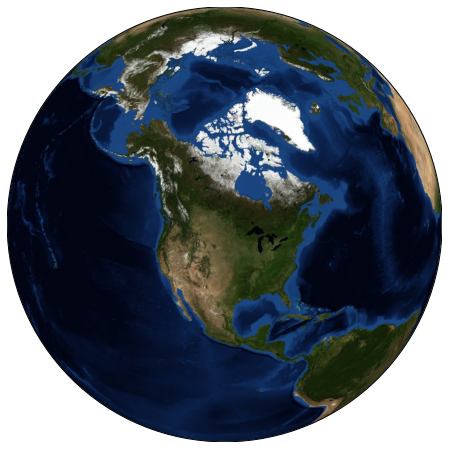

In [ ]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

In [ ]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

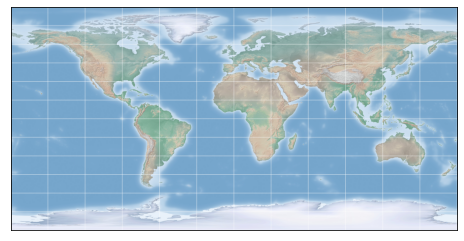

In [ ]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

In [ ]:
# Extract the data we're interested in
lat = df_tidal1['Lat'].values
lon = df_tidal1['Long'].values

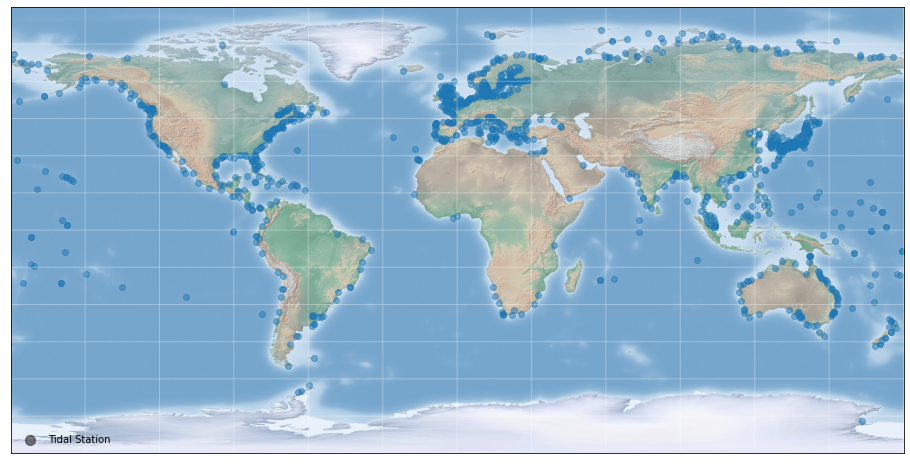

In [ ]:
fig = plt.figure(figsize=(16, 16))
m = Basemap(projection='cyl', resolution='h',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)
# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          cmap='Reds', alpha=0.5)


# make legend with dummy points
for a in [100]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label="Tidal Station")
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');
plt.savefig('TidalStaions.png')